# IMDB Movie dataset

In this workshop, you'll work with a curated subset of movies from the IMDB database.  
Each row is a movie, with information such as:

- `primaryTitle` – the main title
- `startYear` – release year
- `runtimeMinutes` – duration
- `genres` – comma-separated genres
- `averageRating` – average user rating
- `numVotes` – number of votes
- `directors`, `writers` – main credited creators

As promised, we also provide some possible things to do to get started. Pick a level, dig in, or ignore them and do your own thing. Happy coding!

##### Level 1
- New to Pandas? Start by taking a look at the [official documentation](https://pandas.pydata.org/docs/). A good first step is often to look at basic summaries (`.head()`, `.info()`, `.describe()`).
- Think of your favorite movie. Got it? Find it in the data!
- What does the distribution of ratings look like? Plot a [histogram](https://pandas.pydata.org/docs/reference/api/pandas.Series.hist.html) over `averageRating` to find out!
- Look around for outliers (unusually long, unusually high-rated, or unexpectedly low-rated movies). It's especially amusing reading about the low-rated ones on [IMDB's website](https://www.imdb.com/).
- Find a movie you like and identify the director. Can you calculate his average rating? How does it compare to the the average rating for movies in general?

##### Level 2
- Compare ratings or runtimes across decades (e.g. before 1950 vs after 2000). Can you put your finding into a nice visualization?
- Create a new metric (e.g. “rating adjusted for popularity”) and rank movies by it.
- Clean and split the `genres` column so each genre can be counted separately.
- How does the number of reviews explain ratings? Investigate the relationship between `averageRating` and `numVotes`. 
- Build a simple model to predict `averageRating` from features like year, runtime and genres.

##### Level 3
- It would not be a proper data workshop if we didn't mentioned XGBoost at least once. Try to predict `averageRating` using `startYear`, `runtimeMinutes`, `directors`, `writers`, and `genres`. Encoding is necessary, and target encoding with additive smoothing might be a smart move (see [this blog post](https://maxhalford.github.io/blog/target-encoding/)).
- Let's stop messing around and get into Bayesian modeling. Pick your favorite writer and quantify how likely they are to make a good movie, where, for the sake of convenience, we define a good movie as one having a rating higher than 7. *Hint:* You might consider using a [Beta–Binomial conjugate model](https://en.wikipedia.org/wiki/Conjugate_prior#When_the_likelihood_function_is_a_discrete_distribution).

## Getting started

import pandas as pd
from build_imdb_dataset import get_imdb_data

df = get_imdb_data()
df.head()


In [2]:
import pandas as pd
from build_imdb_dataset import get_imdb_data

df = get_imdb_data()
df.head()

[build-imdb] Using cached CSV at /Users/adriansohrabi/Documents/GitHub/data-workshops/data/2025-W48/imdb_movies.csv


,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,directors,writers
0,The Little Colonel,The Little Colonel,1935,81,"Comedy,Family,Musical",7.0,2047,David Butler (1),"William M. Conselman,Anne Fellows Johnston,Dav..."
1,Happiness,Schaste,1935,95,"Comedy,Drama",7.3,1262,Aleksandr Medvedkin,Aleksandr Medvedkin
2,People on Sunday,Menschen am Sonntag,1930,73,"Comedy,Drama,Romance",7.3,3893,"Robert Siodmak,Edgar G. Ulmer,Rochus Gliese,Cu...","Billy Wilder,Curt Siodmak,Robert Siodmak,Edgar..."
3,Abraham Lincoln,Abraham Lincoln,1930,96,"Biography,Drama,War",5.7,1848,D.W. Griffith,"Stephen Vincent Benet,John W. Considine Jr.,Ge..."
4,All Quiet on the Western Front,All Quiet on the Western Front,1930,152,"Drama,War",8.1,71242,Lewis Milestone,"Erich Maria Remarque,Maxwell Anderson,George A..."


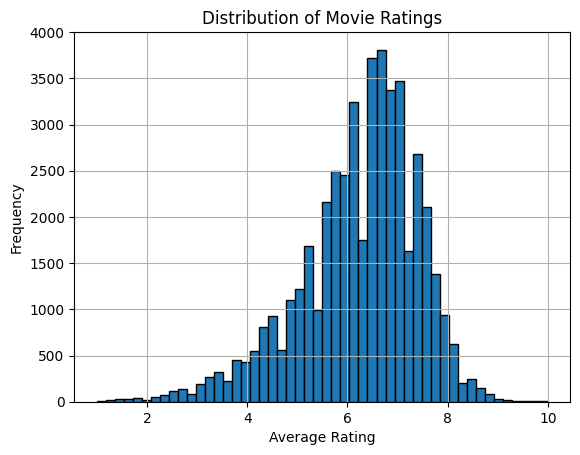

In [3]:
df['averageRating'].hist(bins=50)


In [6]:
# Sök efter en specifik regissör
director_name = "Christopher Nolan"  # Ändra till den regissör du vill söka efter

# Filtrera filmer där regissören finns i directors-kolumnen
director_movies = df[df['directors'].str.contains(director_name, na=False)]

# Visa filmerna
print(f"Filmer av {director_name}:")
print(director_movies[['primaryTitle', 'startYear', 'averageRating']])

# Beräkna genomsnittligt betyg
if len(director_movies) > 0:
    avg_rating = director_movies['averageRating'].mean()
    print(f"\nGenomsnittligt betyg för {director_name}: {avg_rating:.2f}")
    print(f"Antal filmer: {len(director_movies)}")
else:
    print(f"\nInga filmer hittades för {director_name}")


Filmer av Christopher Nolan:
                primaryTitle  startYear  averageRating
14533              Following       1998            7.4
15447                Memento       2000            8.4
16695               Insomnia       2002            7.2
18471          Batman Begins       2005            8.2
20489        The Dark Knight       2008            9.1
20802           The Prestige       2006            8.5
21586           Interstellar       2014            8.7
26823  The Dark Knight Rises       2012            8.4
27101              Inception       2010            8.8
28877            Oppenheimer       2023            8.2
41273                Dunkirk       2017            7.8
43746                  Tenet       2020            7.3

Genomsnittligt betyg för Christopher Nolan: 8.17
Antal filmer: 12
